Excercise 20.3.2 Craft a Story from a Dataset

In [1]:
#Load the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load data
dog_df1 = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/20151001hundehalter.csv')
dog_df2 = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/20160307hundehalter.csv')
dog_df3 = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/20170308hundehalter.csv')
dogtype_df = pd.read_csv('C:/Users/Martin Wipf/Springboard/GIT/Storytelling/DogsZurich/zuordnungstabellehunderassehundetyp.csv')

In [3]:
dog_df1.head(1)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,128485,21-30,w,7.0,74.0,Magyar Viszla,NaN,NaN,NaN,I,2014,w,gelb


In [4]:
dog_df2.head(1)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun


In [5]:
dog_df3.head(1)

,HALTER_ID,ALTER,GESCHLECHT,STADTKREIS,STADTQUARTIER,RASSE1,RASSE1_MISCHLING,RASSE2,RASSE2_MISCHLING,RASSENTYP,GEBURTSJAHR_HUND,GESCHLECHT_HUND,HUNDEFARBE
0,126,61-70,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun


In [6]:
dogtype_df.head(1)

,HUNDERASSE,HUNDERASSENTYP_KURZ,HUNDERASSENTYP
0,Affenpinscher,K,Kleinwüchsig


In [7]:
#rename columns to english headers
dog_df1=dog_df1.rename(columns={'HALTER_ID':'id','ALTER': 'owner_age', 'GESCHLECHT':'owner_gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dog_dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color','RASSENTYP':'breed_short'})
dog_df2=dog_df2.rename(columns={'HALTER_ID':'id','ALTER': 'owner_age', 'GESCHLECHT':'owner_gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dog_dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color','RASSENTYP':'breed_short'})
dog_df3=dog_df3.rename(columns={'HALTER_ID':'id','ALTER': 'owner_age', 'GESCHLECHT':'owner_gender','STADTKREIS': 'district', 'STADTQUARTIER': 'quarter', 'RASSE1': 'primary_breed', 'RASSE2': 'secondary_breed', 'GEBURTSJAHR_HUND':'dog_dob','GESCHLECHT_HUND':'dog_gender','HUNDEFARBE': 'color','RASSENTYP':'breed_short'})
dogtype_df=dogtype_df.rename(columns={'HUNDERASSE':'breed','HUNDERASSENTYP_KURZ':'breed_short','HUNDERASSENTYP':'breed_type'})

In [8]:
dog_df1.head(1)

,id,owner_age,owner_gender,district,quarter,primary_breed,RASSE1_MISCHLING,secondary_breed,RASSE2_MISCHLING,breed_short,dog_dob,dog_gender,color
0,128485,21-30,w,7.0,74.0,Magyar Viszla,NaN,NaN,NaN,I,2014,w,gelb


In [9]:
dogtype_df.head(1)

,breed,breed_short,breed_type
0,Affenpinscher,K,Kleinwüchsig


In [10]:
dog_df1.shape

(6980, 13)

In [11]:
dog_df2.shape

(6930, 13)

In [12]:
dog_df3.shape

(7155, 13)

In [13]:
dogtype_df.shape

(361, 3)

In [14]:
dog_df1['id'].unique().size

6316

In [15]:
dog_df2['id'].unique().size

6275

In [16]:
dog_df3['id'].unique().size

6448

All 3 df's have either duplicates

In [17]:
dog_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6980 entries, 0 to 6979
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6980 non-null   int64  
 1   owner_age         6978 non-null   object 
 2   owner_gender      6980 non-null   object 
 3   district          6978 non-null   float64
 4   quarter           6978 non-null   float64
 5   primary_breed     6980 non-null   object 
 6   RASSE1_MISCHLING  668 non-null    object 
 7   secondary_breed   537 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   breed_short       6980 non-null   object 
 10  dog_dob           6980 non-null   int64  
 11  dog_gender        6980 non-null   object 
 12  color             6980 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 709.0+ KB


In [18]:
dog_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6930 non-null   int64  
 1   owner_age         6928 non-null   object 
 2   owner_gender      6930 non-null   object 
 3   district          6928 non-null   float64
 4   quarter           6928 non-null   float64
 5   primary_breed     6930 non-null   object 
 6   RASSE1_MISCHLING  653 non-null    object 
 7   secondary_breed   510 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   breed_short       6930 non-null   object 
 10  dog_dob           6930 non-null   int64  
 11  dog_gender        6930 non-null   object 
 12  color             6930 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 704.0+ KB


In [19]:
dog_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7155 non-null   int64  
 1   owner_age         7154 non-null   object 
 2   owner_gender      7155 non-null   object 
 3   district          7154 non-null   float64
 4   quarter           7154 non-null   float64
 5   primary_breed     7155 non-null   object 
 6   RASSE1_MISCHLING  618 non-null    object 
 7   secondary_breed   543 non-null    object 
 8   RASSE2_MISCHLING  0 non-null      float64
 9   breed_short       7155 non-null   object 
 10  dog_dob           7155 non-null   int64  
 11  dog_gender        7155 non-null   object 
 12  color             7155 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 726.8+ KB


I suspect that the 3 files/df represent 3 different dates at which respective data was exported to csv files

In [20]:
missing_1 = (dog_df1.isnull().sum())
missing_2 = (dog_df2.isnull().sum())
missing_3 = (dog_df3.isnull().sum())

In [21]:
missing_1

id                     0
owner_age              2
owner_gender           0
district               2
quarter                2
primary_breed          0
RASSE1_MISCHLING    6312
secondary_breed     6443
RASSE2_MISCHLING    6980
breed_short            0
dog_dob                0
dog_gender             0
color                  0
dtype: int64

In [22]:
missing_2

id                     0
owner_age              2
owner_gender           0
district               2
quarter                2
primary_breed          0
RASSE1_MISCHLING    6277
secondary_breed     6420
RASSE2_MISCHLING    6930
breed_short            0
dog_dob                0
dog_gender             0
color                  0
dtype: int64

In [23]:
missing_3

id                     0
owner_age              1
owner_gender           0
district               1
quarter                1
primary_breed          0
RASSE1_MISCHLING    6537
secondary_breed     6612
RASSE2_MISCHLING    7155
breed_short            0
dog_dob                0
dog_gender             0
color                  0
dtype: int64

Clean Data

In [24]:
#drop columns RASSE1_MISCHLING, secondary_breed, RASSE2_MISCHLING as the vast majority in all 3 df's have missing entries
dog_df1 = dog_df1.drop(columns=['RASSE1_MISCHLING', 'secondary_breed','RASSE2_MISCHLING'])
dog_df2 = dog_df2.drop(columns=['RASSE1_MISCHLING', 'secondary_breed','RASSE2_MISCHLING'])
dog_df3 = dog_df3.drop(columns=['RASSE1_MISCHLING', 'secondary_breed','RASSE2_MISCHLING'])

In [25]:
#drop columns with missing owner_age
dog_df1['owner_age'][dog_df1['owner_age'].isnull()]
dog_df2['owner_age'][dog_df2['owner_age'].isnull()]
dog_df3['owner_age'][dog_df3['owner_age'].isnull()]
#drop columns with missing district
dog_df1['district'][dog_df1['district'].isnull()]
dog_df2['district'][dog_df2['district'].isnull()]
dog_df3['district'][dog_df3['district'].isnull()]
#drop columns with missing quarter
dog_df1['quarter'][dog_df1['quarter'].isnull()]
dog_df2['quarter'][dog_df2['quarter'].isnull()]
dog_df3['quarter'][dog_df3['quarter'].isnull()]

2234   NaN
Name: quarter, dtype: float64

In [26]:
#check for and delete duplicates
dog_df1[dog_df1.duplicated(keep=False)].sort_values('id')

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color
6762,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
6761,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
6478,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
6479,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
6330,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
6329,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
6321,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
6143,83309,71-80,m,9.0,91.0,Yorkshire Terrier,K,2007,w,blue/tan
6142,83309,71-80,m,9.0,91.0,Yorkshire Terrier,K,2007,w,blue/tan
5806,85073,41-50,w,12.0,123.0,Jack Russel Terrier,K,2002,m,tricolor


In [27]:
dog_df2[dog_df2.duplicated(keep=False)].sort_values('id')

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color
211,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
212,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
481,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
482,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
625,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
...,...,...,...,...,...,...,...,...,...,...
6362,127401,31-40,w,9.0,92.0,Labrador Retriever,I,2003,m,braun
6395,127656,31-40,w,7.0,72.0,Toypudel,K,2009,m,schwarz
6396,127656,31-40,w,7.0,72.0,Toypudel,K,2009,m,schwarz
6534,128239,51-60,w,2.0,24.0,Mischling gross,I,2015,m,braun


In [28]:
dog_df3[dog_df3.duplicated(keep=False)].sort_values('id')


,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color
214,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
215,80335,61-70,w,12.0,122.0,Irish Setter,I,2008,m,braun
468,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
469,81702,51-60,w,11.0,119.0,Collie,I,2011,w,tricolor
603,82452,61-70,w,10.0,102.0,Dachshund,K,1999,w,schwarz/rot
...,...,...,...,...,...,...,...,...,...,...
5854,127656,31-40,w,7.0,72.0,Toypudel,K,2009,m,schwarz
6541,132228,31-40,w,8.0,81.0,Französische Bulldogge,K,2015,m,fawn
6542,132228,31-40,w,8.0,81.0,Französische Bulldogge,K,2015,m,fawn
6716,132963,41-50,w,11.0,111.0,Pinscher,K,2014,w,schwarz


In [29]:
dog_df1.drop_duplicates(keep='first', inplace=True)
dog_df2.drop_duplicates(keep='first', inplace=True)
dog_df3.drop_duplicates(keep='first', inplace=True)

In [30]:
dog_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6950 entries, 0 to 6979
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6950 non-null   int64  
 1   owner_age      6948 non-null   object 
 2   owner_gender   6950 non-null   object 
 3   district       6948 non-null   float64
 4   quarter        6948 non-null   float64
 5   primary_breed  6950 non-null   object 
 6   breed_short    6950 non-null   object 
 7   dog_dob        6950 non-null   int64  
 8   dog_gender     6950 non-null   object 
 9   color          6950 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 597.3+ KB


In [31]:
dog_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 6929
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6898 non-null   int64  
 1   owner_age      6896 non-null   object 
 2   owner_gender   6898 non-null   object 
 3   district       6896 non-null   float64
 4   quarter        6896 non-null   float64
 5   primary_breed  6898 non-null   object 
 6   breed_short    6898 non-null   object 
 7   dog_dob        6898 non-null   int64  
 8   dog_gender     6898 non-null   object 
 9   color          6898 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 592.8+ KB


In [32]:
dog_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7124 entries, 0 to 7154
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7124 non-null   int64  
 1   owner_age      7123 non-null   object 
 2   owner_gender   7124 non-null   object 
 3   district       7123 non-null   float64
 4   quarter        7123 non-null   float64
 5   primary_breed  7124 non-null   object 
 6   breed_short    7124 non-null   object 
 7   dog_dob        7124 non-null   int64  
 8   dog_gender     7124 non-null   object 
 9   color          7124 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 612.2+ KB


In [33]:
dog_df1.reset_index(drop=True, inplace=True)
dog_df2.reset_index(drop=True, inplace=True)
dog_df3.reset_index(drop=True, inplace=True)

<AxesSubplot:>

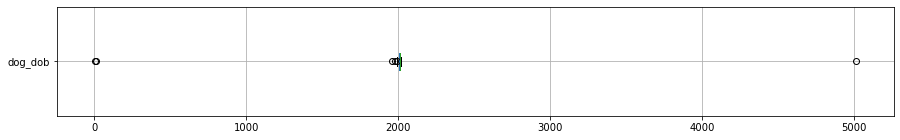

In [34]:
# boxplot dog age
df=dog_df1.loc[:,['dog_dob']]
df.boxplot(vert=False, figsize=(15,2))

In [35]:
check_age1 = dog_df1['dog_dob'][(dog_df1['dog_dob'] < 1980) | (dog_df1['dog_dob'] > 2015)]
check_age1

1366    2016
2425    5012
3444    1962
3799       1
4062       8
Name: dog_dob, dtype: int64

In [36]:
dog_df1.iloc[2425]

id                               111954
owner_age                         41-50
owner_gender                          w
district                              3
quarter                              34
primary_breed    Parson Russell Terrier
breed_short                           K
dog_dob                            5012
dog_gender                            m
color                          tricolor
Name: 2425, dtype: object

In [37]:
check_age2 = dog_df2['dog_dob'][(dog_df2['dog_dob'] < 1980) | (dog_df2['dog_dob'] > 2016)]
check_age2

4295    5012
Name: dog_dob, dtype: int64

In [38]:
dog_df2.iloc[4295]

id                               111954
owner_age                         51-60
owner_gender                          w
district                              3
quarter                              34
primary_breed    Parson Russell Terrier
breed_short                           K
dog_dob                            5012
dog_gender                            m
color                          tricolor
Name: 4295, dtype: object

In [39]:
#Correct dob to 5012 to 2012 in dog_df1 and dog_df2 (same do in both df's)
dog_df1['dog_dob'].iloc[2425] = 2012
dog_df2['dog_dob'].iloc[2425] = 2012

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [40]:
check_age3 = dog_df3['dog_dob'][(dog_df3['dog_dob'] < 1980) | (dog_df3['dog_dob'] > 2017)]
check_age3

Series([], Name: dog_dob, dtype: int64)

In [41]:
# remove anomalous ages
dog_df1 = dog_df1.loc[(dog_df1['dog_dob'] > 1980) & (dog_df1['dog_dob'] < 2015)]
dog_df2 = dog_df2.loc[(dog_df2['dog_dob'] > 1980) & (dog_df2['dog_dob'] < 2016)]
dog_df3 = dog_df3.loc[(dog_df3['dog_dob'] > 1980) & (dog_df3['dog_dob'] < 2017)]

<AxesSubplot:>

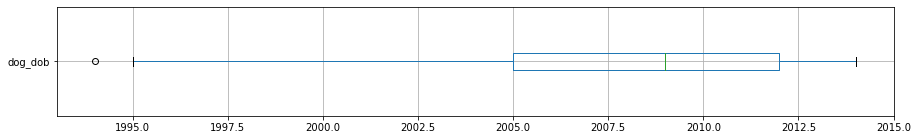

In [42]:
# boxplot dog age
df=dog_df1.loc[:,['dog_dob']]
df.boxplot(vert=False, figsize=(15,2))

In [43]:
# add column with dog age
dog_df1['dog_age'] = 2015 - dog_df1['dog_dob']
dog_df2['dog_age'] = 2016 - dog_df2['dog_dob']
dog_df3['dog_age'] = 2017 - dog_df3['dog_dob']

In [44]:
#add column for year data was collected and merge df's
dog_df1['survey_year'] = 2015
dog_df2['survey_year'] = 2016
dog_df3['survey_year'] = 2017

final_dog_df = pd.concat([dog_df1, dog_df2, dog_df3])
final_dog_df = final_dog_df.reset_index(drop=True)

final_dog_df.sample(10)

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color,dog_age,survey_year
9176,90521,61-70,m,11.0,111.0,Golden Retriever,I,2007,w,blondfarben,9,2016
20121,131973,31-40,m,2.0,24.0,Bulldog,I,2010,m,braun/weiss,7,2017
6805,15490,61-70,m,9.0,92.0,Parson Jack Russell Terrier,K,2015,m,weiss/blau,1,2016
13917,80684,71-80,w,2.0,21.0,Bergamasker,I,2009,m,tricolor,8,2017
17232,106426,41-50,w,3.0,33.0,Zwergpinscher,K,2011,m,schwarz/braun,6,2017
15291,88146,61-70,m,1.0,13.0,Terrier,K,2001,m,schwarz,16,2017
3299,100057,41-50,w,3.0,31.0,Bichon Havanais,K,1999,m,creme,16,2015
19918,130541,31-40,m,2.0,21.0,Magyar Viszla,I,2009,w,gelb,8,2017
16183,94757,61-70,m,6.0,63.0,Deutsch Drahthaar,I,2008,w,braun schimmel,9,2017
4005,93247,41-50,w,3.0,31.0,Mischling klein,K,2014,w,beige,1,2015


In [45]:
(final_dog_df.isnull().sum())

id               0
owner_age        5
owner_gender     0
district         5
quarter          5
primary_breed    0
breed_short      0
dog_dob          0
dog_gender       0
color            0
dog_age          0
survey_year      0
dtype: int64

In [46]:
final_dog_df= final_dog_df.dropna()
(final_dog_df.isnull().sum())

id               0
owner_age        0
owner_gender     0
district         0
quarter          0
primary_breed    0
breed_short      0
dog_dob          0
dog_gender       0
color            0
dog_age          0
survey_year      0
dtype: int64

In [47]:
final_dog_df.shape

(20764, 12)

Explore and plot data

In [48]:
#Filter data on survey year
year = 2017
data_year_mask = final_dog_df['survey_year'] == year
data = final_dog_df[data_year_mask]
data.head(3)

,id,owner_age,owner_gender,district,quarter,primary_breed,breed_short,dog_dob,dog_gender,color,dog_age,survey_year
13648,126,61-70,m,9.0,92.0,Welsh Terrier,K,2011,w,schwarz/braun,6,2017
13649,171,61-70,m,3.0,31.0,Berner Sennenhund,I,2009,m,tricolor,8,2017
13650,574,61-70,w,2.0,23.0,Mischling gross,I,2013,w,schwarz,4,2017


<AxesSubplot:>

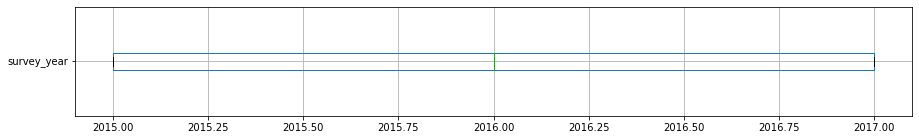

In [49]:
# boxplot dog age
df=final_dog_df.loc[:,['survey_year']]
df.boxplot(vert=False, figsize=(15,2))

<Figure size 576x720 with 0 Axes>

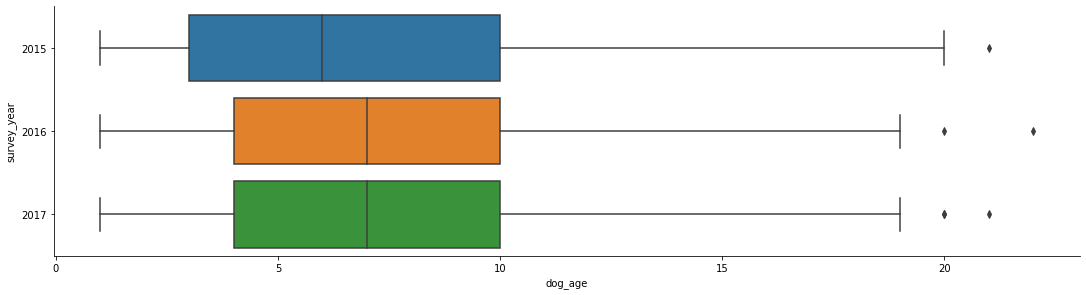

In [50]:
parameter = "dog_age"
plt.figure(figsize = (8,10))
_=sns.catplot(x=parameter,
                 y="survey_year", data=final_dog_df, height=4, aspect=15/4, kind="box", orient= "h")

<BarContainer object of 2 artists>

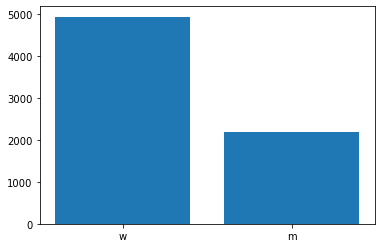

In [51]:
#Number of dog owner by gender
plt.bar(['w','m'],data['owner_gender'].value_counts())

<BarContainer object of 2 artists>

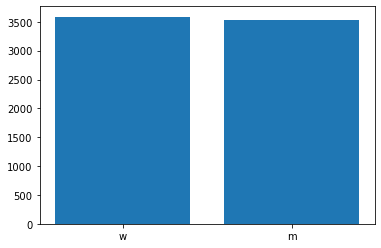

In [52]:
#Number of dog owner by gender
plt.bar(['w','m'],data['dog_gender'].value_counts())

In [53]:
#popularity of breeds by gender of owners
genders_dogbreed=data.groupby(['primary_breed','owner_gender'])['id'].count().unstack()
genders_dogbreed=genders_dogbreed.fillna(0)
genders_dogbreed['m']=genders_dogbreed['m']
genders_dogbreed['w']=genders_dogbreed['w']
genders_dogbreed['total']=genders_dogbreed['w']+genders_dogbreed['m']
genders_dogbreed['m%']=genders_dogbreed['m']/len(genders_dogbreed['m'])*100
genders_dogbreed['w%']=genders_dogbreed['w']/len(genders_dogbreed['w'])*100
genders_dogbreed['delta'] = genders_dogbreed['m']-genders_dogbreed['w']
genders_dogbreed['delta%'] = genders_dogbreed['m%']-genders_dogbreed['w%']

In [54]:
genders_dogbreed.describe()

owner_gender,m,w,total,m%,w%,delta,delta%
count,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,7.194079,16.233553,23.427632,2.366473,5.339984,-9.039474,-2.973511
std,19.398679,44.512483,63.036173,6.381144,14.642264,27.235650,8.959095
min,0.000000,0.000000,1.000000,0.000000,0.000000,-278.000000,-91.447368
25%,1.000000,1.000000,2.000000,0.328947,0.328947,-7.000000,-2.302632
50%,2.000000,4.000000,5.000000,0.657895,1.315789,-2.000000,-0.657895
75%,6.000000,11.000000,16.000000,1.973684,3.618421,0.000000,0.000000
max,183.000000,440.000000,620.000000,60.197368,144.736842,5.000000,1.644737


In [55]:
genders_dogbreed.sort_values(by=['total'], ascending=False).head(10)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Mischling klein,180.0,440.0,620.0,59.210526,144.736842,-260.0,-85.526316
Chihuahua,118.0,396.0,514.0,38.815789,130.263158,-278.0,-91.447368
Labrador Retriever,183.0,255.0,438.0,60.197368,83.881579,-72.0,-23.684211
Yorkshire Terrier,78.0,216.0,294.0,25.657895,71.052632,-138.0,-45.394737
Jack Russel Terrier,101.0,188.0,289.0,33.223684,61.842105,-87.0,-28.618421
Französische Bulldogge,79.0,133.0,212.0,25.986842,43.750000,-54.0,-17.763158
Mischling gross,61.0,145.0,206.0,20.065789,47.697368,-84.0,-27.631579
Malteser,44.0,160.0,204.0,14.473684,52.631579,-116.0,-38.157895
Mops,43.0,128.0,171.0,14.144737,42.105263,-85.0,-27.960526


In [56]:
genders_dogbreed.sort_values(by=['delta%']).head(5)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Chihuahua,118.0,396.0,514.0,38.815789,130.263158,-278.0,-91.447368
Mischling klein,180.0,440.0,620.0,59.210526,144.736842,-260.0,-85.526316
Yorkshire Terrier,78.0,216.0,294.0,25.657895,71.052632,-138.0,-45.394737
Malteser,44.0,160.0,204.0,14.473684,52.631579,-116.0,-38.157895
Jack Russel Terrier,101.0,188.0,289.0,33.223684,61.842105,-87.0,-28.618421


In [57]:
genders_dogbreed.sort_values(by=['delta%'], ascending=False).head(5)

owner_gender,m,w,total,m%,w%,delta,delta%
primary_breed,,,,,,,
Dobermann,8.0,3.0,11.0,2.631579,0.986842,5.0,1.644737
Dogo Argentino,7.0,2.0,9.0,2.302632,0.657895,5.0,1.644737
Old Englische Bulldogge,8.0,4.0,12.0,2.631579,1.315789,4.0,1.315789
Bayerischer Gebirgsschweisshund,4.0,0.0,4.0,1.315789,0.000000,4.0,1.315789
Cane Corso,4.0,0.0,4.0,1.315789,0.000000,4.0,1.315789


<AxesSubplot:xlabel='primary_breed'>

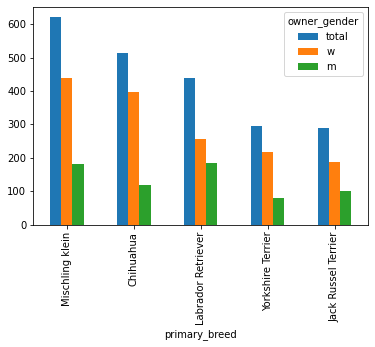

In [58]:
(genders_dogbreed.sort_values(by=['total'], ascending=False).head(5))[[ 'total', 'w', 'm']].plot(kind='bar')

<AxesSubplot:xlabel='primary_breed'>

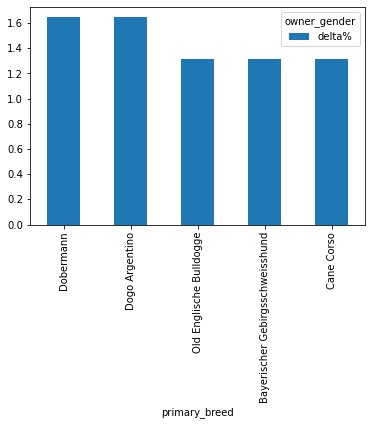

In [59]:
(genders_dogbreed.sort_values(by=['delta%'], ascending=False).head(5))[['delta%']].plot(kind='bar')

<AxesSubplot:xlabel='primary_breed'>

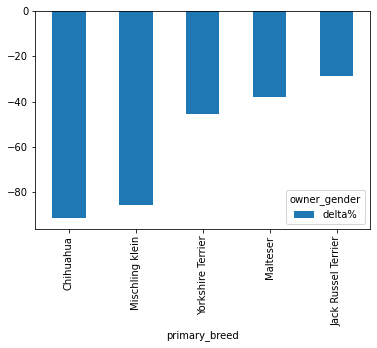

In [60]:
(genders_dogbreed.sort_values(by=['delta%']).head(5))[['delta%']].plot(kind='bar')

<AxesSubplot:xlabel='primary_breed'>

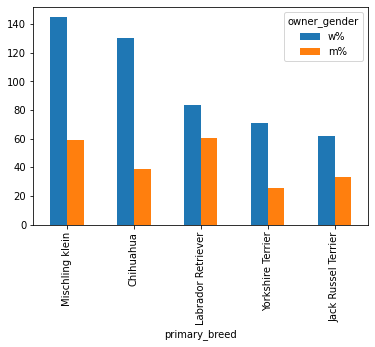

In [61]:
(genders_dogbreed.sort_values(by=['w%'], ascending=False).head(5))[['w%','m%']].plot(kind='bar')

In [62]:
#relationship between gender of owner and gender of dog
gender_dog=data.groupby(['dog_gender','owner_gender'])['id'].count().unstack()
gender_dog

owner_gender,m,w
dog_gender,,
m,1170,2364
w,1017,2571


<AxesSubplot:xlabel='dog_gender'>

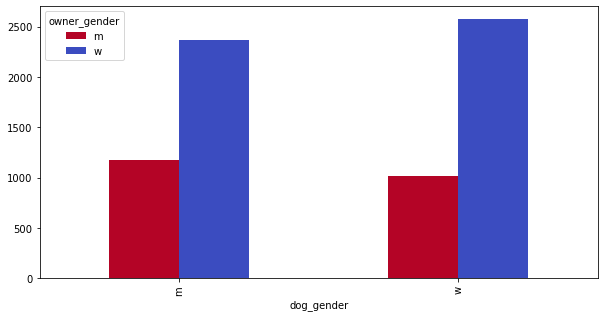

In [63]:
fig, ax = plt.subplots(figsize=(10, 5))
gender_dog.plot(kind='bar',ax=ax,colormap=plt.cm.coolwarm_r, grid=False)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


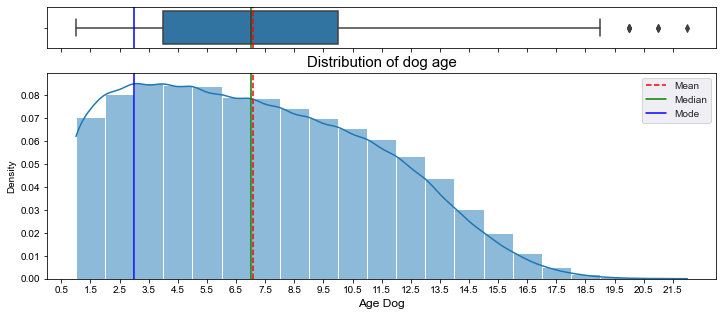

In [64]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(12,5))

data_plot = final_dog_df['dog_age']

mean=data_plot.mean()
median=data_plot.median()
mode=data_plot.mode().values[0]

sns.set_style("darkgrid")

sns.boxplot(data_plot, ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data_plot, binwidth = 1, kde=True, stat="density")
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")

plt.xticks(np.arange(min(data_plot)-0.5, max(data_plot)+0.5, 1))
plt.xlabel('Age Dog', fontsize=12)
plt.title("Distribution of dog age", fontsize=15)
plt.xlim(min(data_plot)-1, max(data_plot) + 1)

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()


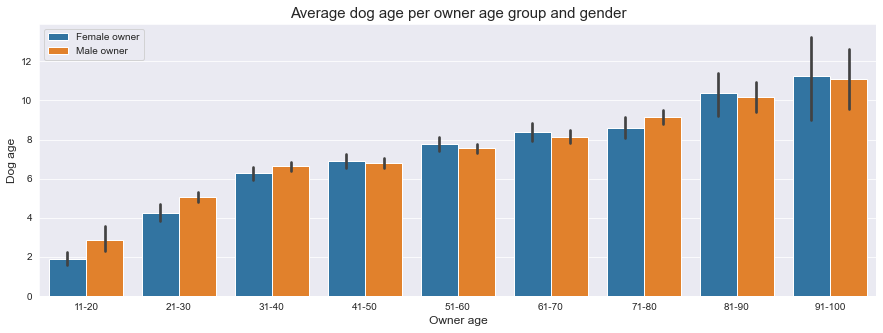

In [65]:
data_plot = data

plt.figure(figsize=(15,5))
owner_age = (data_plot['owner_age'].sort_values())
ax = sns.barplot(x=owner_age, y=data['dog_age'], hue=data['owner_gender'])

l = plt.legend()
l.get_texts()[0].set_text('Female owner')
l.get_texts()[1].set_text('Male owner')

plt.xlabel('Owner age', fontsize=12)
plt.ylabel('Dog age', fontsize=12)
plt.title('Average dog age per owner age group and gender', fontsize=15)

plt.show()

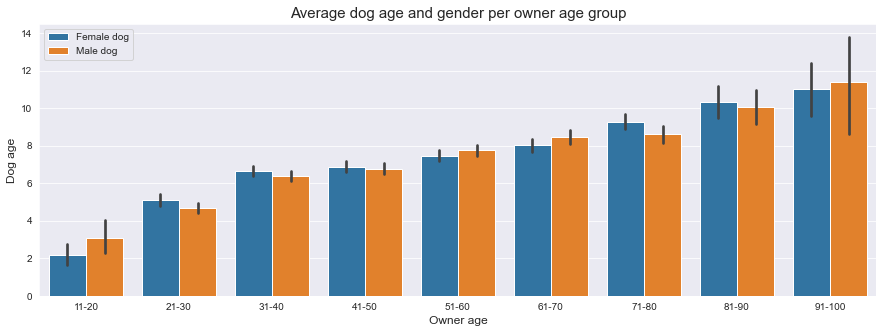

In [66]:
data_plot = data

plt.figure(figsize=(15,5))
owner_age = (data_plot['owner_age'].sort_values())
ax = sns.barplot(x=owner_age, y=data['dog_age'], hue=data['dog_gender'])

l = plt.legend()
l.get_texts()[0].set_text('Female dog')
l.get_texts()[1].set_text('Male dog')

plt.xlabel('Owner age', fontsize=12)
plt.ylabel('Dog age', fontsize=12)
plt.title('Average dog age and gender per owner age group', fontsize=15)

plt.show()

In [67]:
breeds = data['primary_breed'].value_counts()
breeds_percent = (breeds/sum(breeds)*100)

In [68]:
breeds.head(12)

Mischling klein           620
Chihuahua                 514
Labrador Retriever        438
Yorkshire Terrier         294
Jack Russel Terrier       289
Französische Bulldogge    212
Mischling gross           206
Malteser                  204
Mops                      171
Golden Retriever          153
Bolonka Zwetna            100
Pudel                     100
Name: primary_breed, dtype: int64

In [69]:
breeds_percent.head(12)

Mischling klein           8.705420
Chihuahua                 7.217074
Labrador Retriever        6.149958
Yorkshire Terrier         4.128054
Jack Russel Terrier       4.057849
Französische Bulldogge    2.976692
Mischling gross           2.892446
Malteser                  2.864364
Mops                      2.401011
Golden Retriever          2.148273
Bolonka Zwetna            1.404100
Pudel                     1.404100
Name: primary_breed, dtype: float64

In [70]:
#most popular breeds by district (Kreis)
data = final_dog_df[data_year_mask]
district_1 = data[data['district'] == 1]
district_2 = data[data['district'] == 2]
district_3 = data[data['district'] == 3]
district_4 = data[data['district'] == 4]
district_5 = data[data['district'] == 5]
district_6 = data[data['district'] == 6]
district_7 = data[data['district'] == 7]
district_8 = data[data['district'] == 8]
district_9 = data[data['district'] == 9]
district_10 = data[data['district'] == 1]
district_11 = data[data['district'] == 11]
district_12 = data[data['district'] == 12]

<ipython-input-71-5db6ae2797a5>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)
<ipython-input-71-5db6ae2797a5>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)
<ipython-input-71-5db6ae2797a5>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)
<ipython-input-71-5db6ae2797a5>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)
<ipython-input-71-5db6ae2797a5>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)
<ipython-input-71-5db6ae2797a5>:56: UserWarning: FixedFormatter should only be used t

[Text(0, 0, 'Chihuahua'),
 Text(1, 0, 'Yorkshire Terrier'),
 Text(2, 0, 'Mischling klein'),
 Text(3, 0, 'Malteser'),
 Text(4, 0, 'Labrador Retriever')]

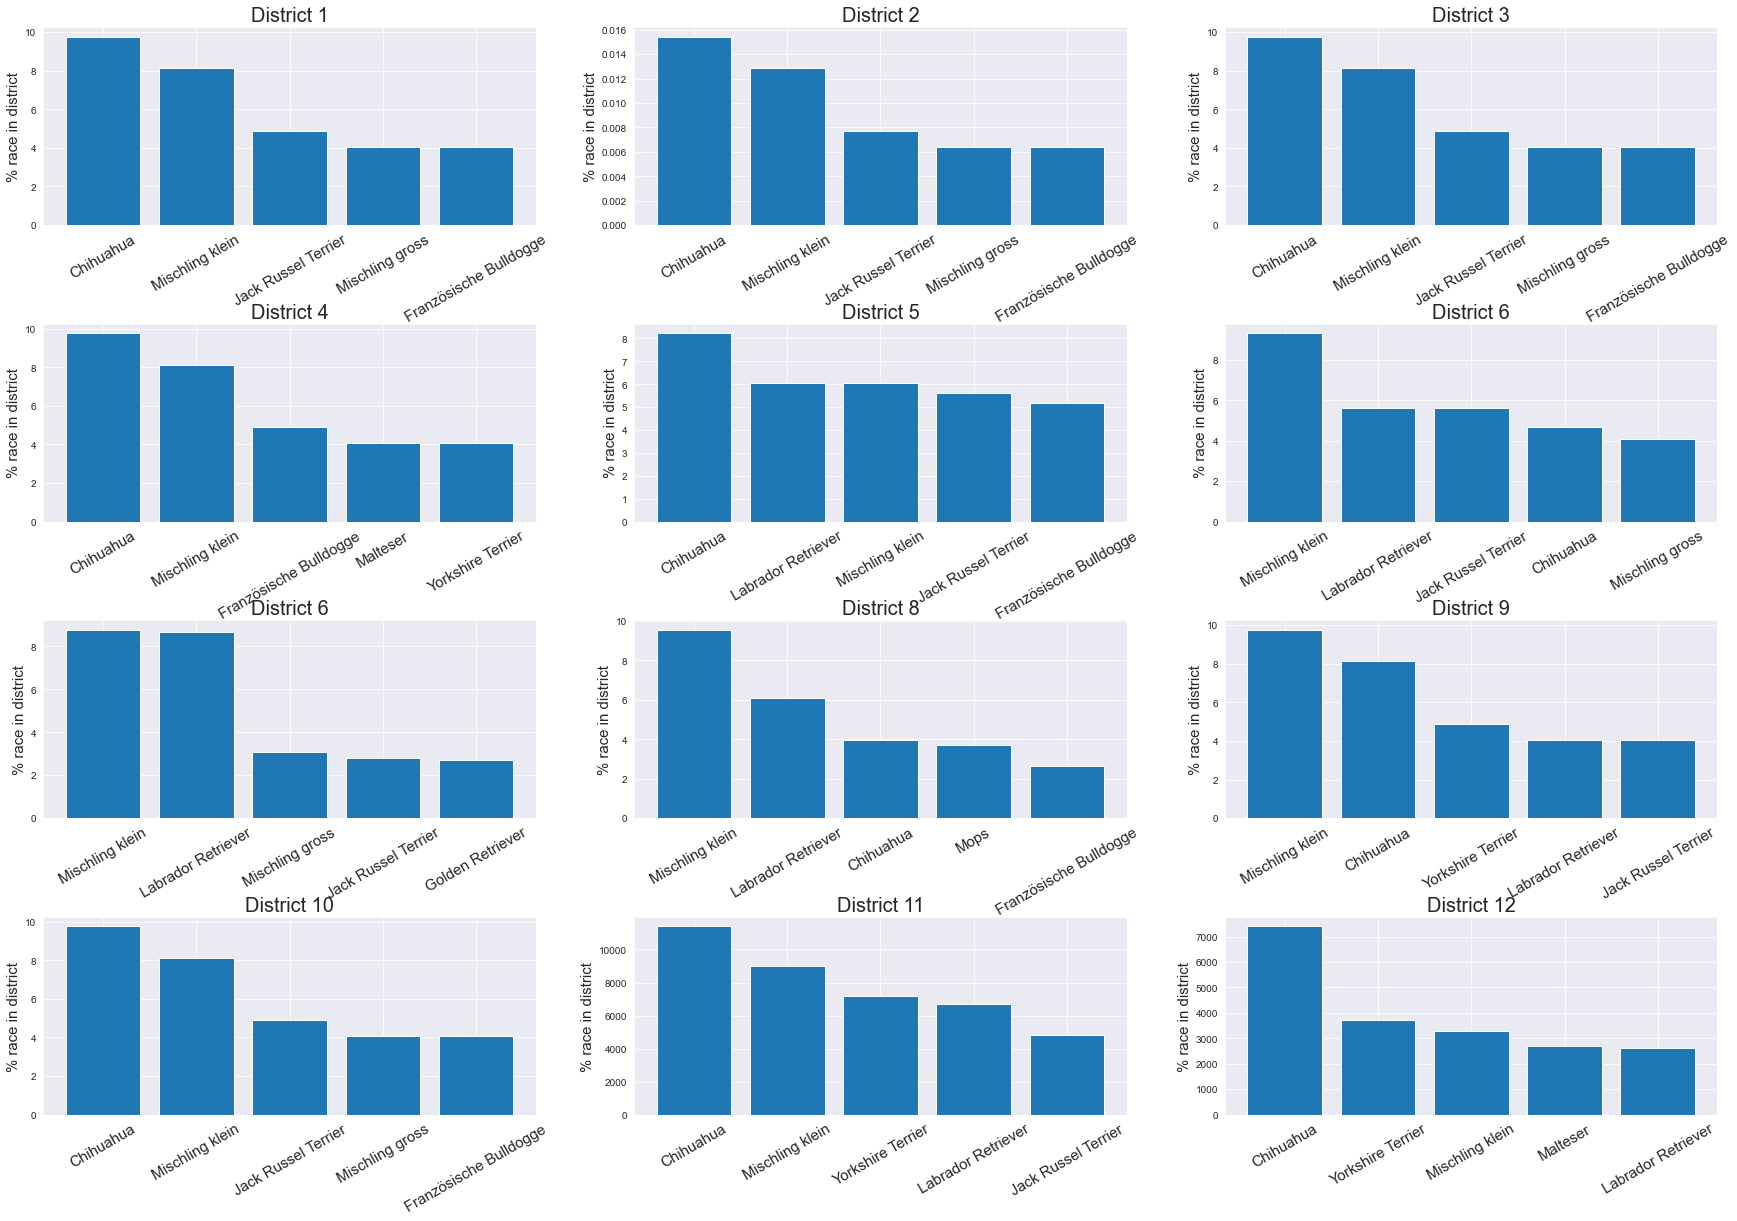

In [71]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
plt.subplots_adjust(hspace=0.5)

# district 1 plot
d1_races = district_1['primary_breed'].value_counts()
d1_races = d1_races/sum(d1_races)
d1_races_percent = (d1_races*100).head(5)
ax1.bar(d1_races_percent.index , d1_races_percent)
ax1.set_title('District 1', fontsize=20)
ax1.set_ylabel('% race in district', fontsize=15)
ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)

# district 2 plot
d2_races = district_2['primary_breed'].value_counts()
d2_races = d1_races/sum(d2_races)
d2_races_percent = (d2_races*100).head(5)
ax2.bar(d2_races_percent.index , d2_races_percent)
ax2.set_title('District 2', fontsize=20)
ax2.set_ylabel('% race in district', fontsize=15)
ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)

# district 3 plot
d3_races = district_3['primary_breed'].value_counts()
d3_races = d1_races/sum(d1_races)
d3_races_percent = (d3_races*100).head(5)
ax3.bar(d1_races_percent.index , d1_races_percent)
ax3.set_title('District 3', fontsize=20)
ax3.set_ylabel('% race in district', fontsize=15)
ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)

# district 4 plot
d4_races = district_4['primary_breed'].value_counts()
d4_races = d4_races/sum(d4_races)
d4_races_percent = (d4_races*100).head(5)
ax4.bar(d4_races_percent.index , d1_races_percent)
ax4.set_title('District 4', fontsize=20)
ax4.set_ylabel('% race in district', fontsize=15)
ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)

# district 5 plot
d5_races = district_5['primary_breed'].value_counts()
d5_races = d5_races/sum(d5_races)
d5_races_percent = (d5_races*100).head(5)
ax5.bar(d5_races_percent.index , d5_races_percent)
ax5.set_title('District 5', fontsize=20)
ax5.set_ylabel('% race in district', fontsize=15)
ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)

# district 6 plot
d6_races = district_6['primary_breed'].value_counts()
d6_races = d6_races/sum(d6_races)
d6_races_percent = (d6_races*100).head(5)
ax6.bar(d6_races_percent.index , d6_races_percent)
ax6.set_title('District 6', fontsize=20)
ax6.set_ylabel('% race in district', fontsize=15)
ax6.set_xticklabels(d6_races_percent.index, rotation=30, fontsize=15)

# district 7 plot
d7_races = district_7['primary_breed'].value_counts()
d7_races = d7_races/sum(d7_races)
d7_races_percent = (d7_races*100).head(5)
ax7.bar(d6_races_percent.index , d7_races_percent)
ax7.set_title('District 6', fontsize=20)
ax7.set_ylabel('% race in district', fontsize=15)
ax7.set_xticklabels(d7_races_percent.index, rotation=30, fontsize=15)

# district 8 plot
d8_races = district_8['primary_breed'].value_counts()
d8_races = d8_races/sum(d8_races)
d8_races_percent = (d8_races*100).head(5)
ax8.bar(d8_races_percent.index , d8_races_percent)
ax8.set_title('District 8', fontsize=20)
ax8.set_ylabel('% race in district', fontsize=15)
ax8.set_xticklabels(d8_races_percent.index, rotation=30, fontsize=15)

# district 9 plot
d9_races = district_9['primary_breed'].value_counts()
d9_races = d9_races/sum(d9_races)
d9_races_percent = (d9_races*100).head(5)
ax9.bar(d1_races_percent.index , d1_races_percent)
ax9.set_title('District 9', fontsize=20)
ax9.set_ylabel('% race in district', fontsize=15)
ax9.set_xticklabels(d9_races_percent.index, rotation=30, fontsize=15)

# district 10 plot
d10_races = district_10['primary_breed'].value_counts()
d10_races = d1_races/sum(d10_races)
d10_races_percent = (d10_races*100).head(5)
ax10.bar(d10_races_percent.index , d1_races_percent)
ax10.set_title('District 10', fontsize=20)
ax10.set_ylabel('% race in district', fontsize=15)
ax10.set_xticklabels(d10_races_percent.index, rotation=30, fontsize=15)

# district 11 plot
d11_races = district_11['primary_breed'].value_counts()
d11_races = d11_races/sum(d1_races)
d11_races_percent = (d11_races*100).head(5)
ax11.bar(d11_races_percent.index , d11_races_percent)
ax11.set_title('District 11', fontsize=20)
ax11.set_ylabel('% race in district', fontsize=15)
ax11.set_xticklabels(d11_races_percent.index, rotation=30, fontsize=15)

# district 12 plot
d12_races = district_12['primary_breed'].value_counts()
d12_races = d12_races/sum(d1_races)
d12_races_percent = (d12_races*100).head(5)
ax12.bar(d12_races_percent.index , d12_races_percent)
ax12.set_title('District 12', fontsize=20)
ax12.set_ylabel('% race in district', fontsize=15)
ax12.set_xticklabels(d12_races_percent.index, rotation=30, fontsize=15)


<ipython-input-72-4ba1ea8e147f>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)
<ipython-input-72-4ba1ea8e147f>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)
<ipython-input-72-4ba1ea8e147f>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)
<ipython-input-72-4ba1ea8e147f>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)
<ipython-input-72-4ba1ea8e147f>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)
<ipython-input-72-4ba1ea8e147f>:44: UserWarning: FixedFormatter should only be used to

[Text(0, 0, 'Chihuahua'),
 Text(1, 0, 'Yorkshire Terrier'),
 Text(2, 0, 'Mischling klein'),
 Text(3, 0, 'Malteser'),
 Text(4, 0, 'Labrador Retriever')]

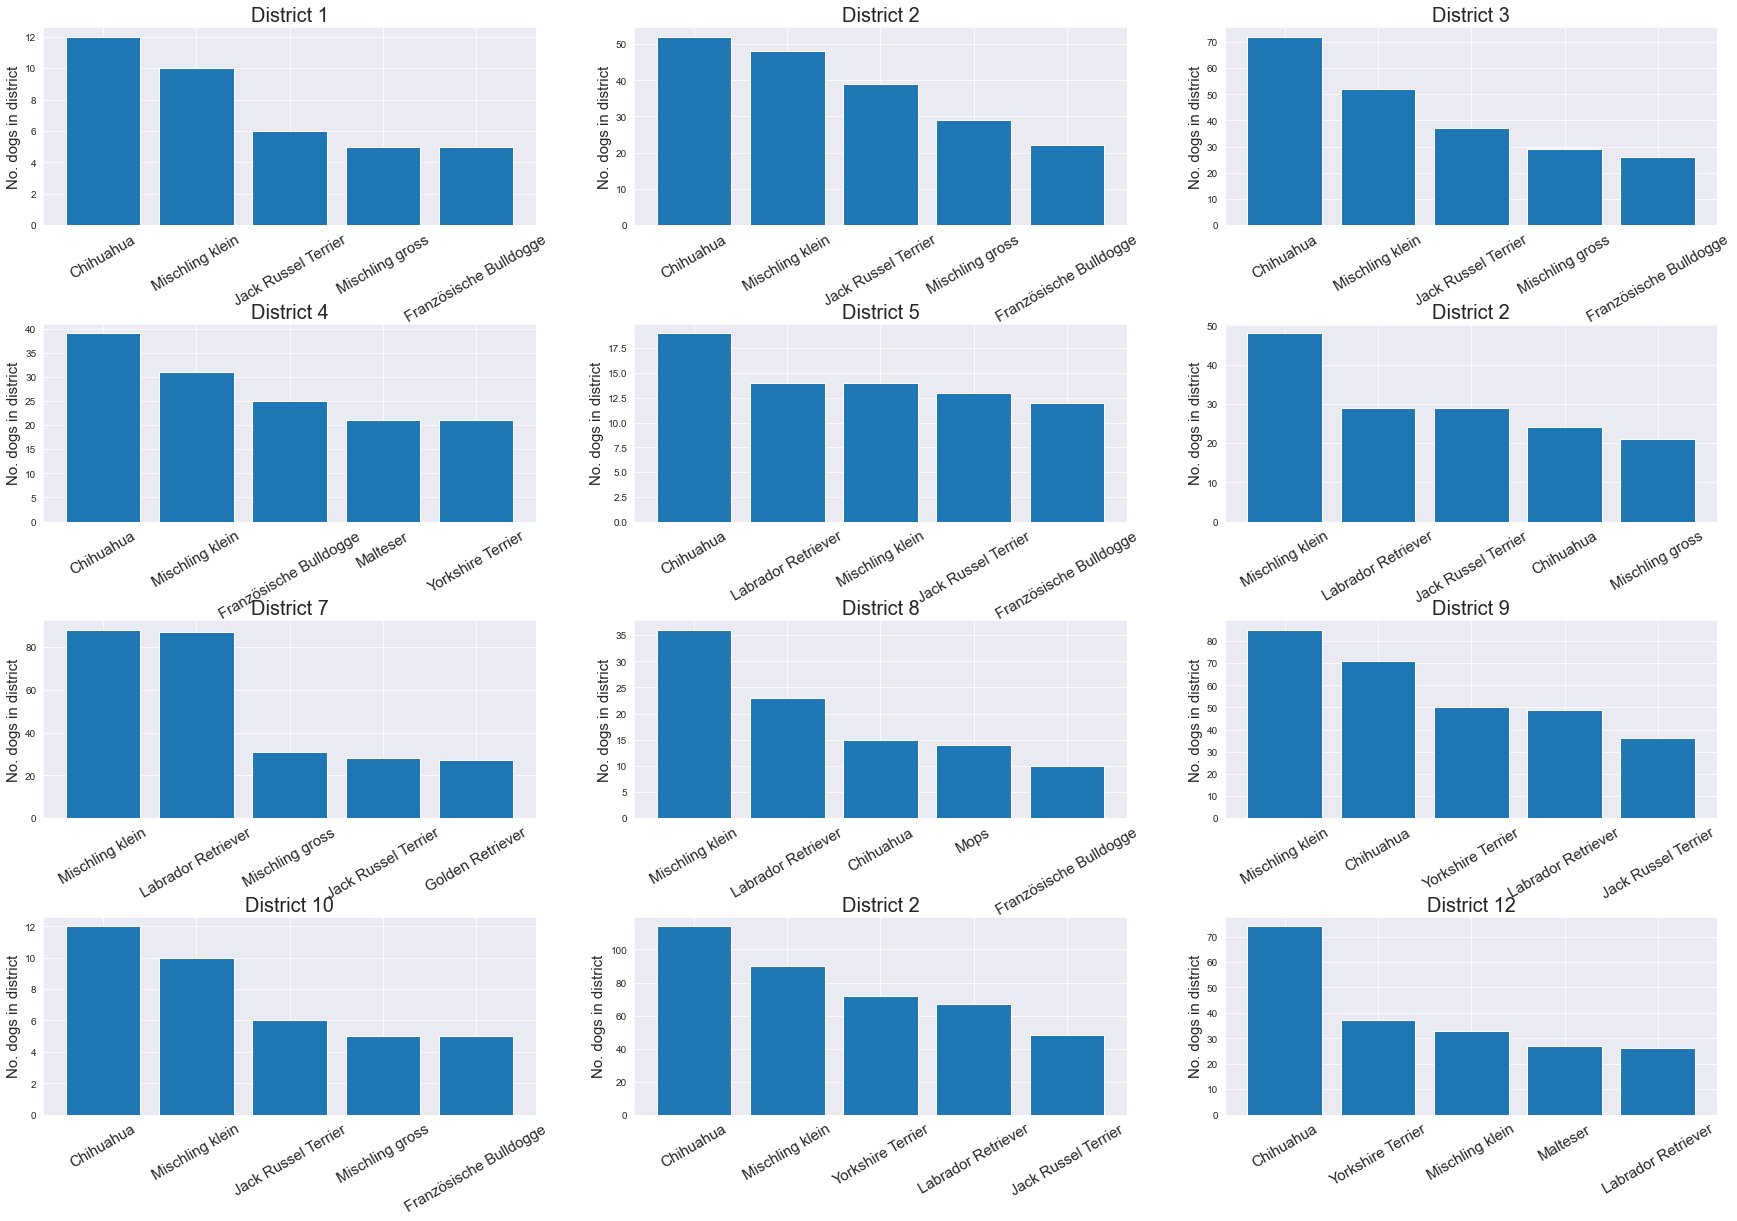

In [72]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(30,20))
plt.subplots_adjust(hspace=0.5)

# district 1 plot
d1_races = district_1['primary_breed'].value_counts().head(5)
ax1.bar(d1_races.index , d1_races)
ax1.set_title('District 1', fontsize=20)
ax1.set_ylabel('No. dogs in district', fontsize=15)
ax1.set_xticklabels(d1_races_percent.index, rotation=30, fontsize=15)

# district 2 plot
d2_races = district_2['primary_breed'].value_counts().head(5)
ax2.bar(d2_races.index , d2_races)
ax2.set_title('District 2', fontsize=20)
ax2.set_ylabel('No. dogs in district', fontsize=15)
ax2.set_xticklabels(d2_races_percent.index, rotation=30, fontsize=15)

# district 3 plot
d3_races = district_3['primary_breed'].value_counts().head(5)
ax3.bar(d3_races.index , d3_races)
ax3.set_title('District 3', fontsize=20)
ax3.set_ylabel('No. dogs in district', fontsize=15)
ax3.set_xticklabels(d3_races_percent.index, rotation=30, fontsize=15)

# district 4 plot
d4_races = district_4['primary_breed'].value_counts().head(5)
ax4.bar(d4_races.index , d4_races)
ax4.set_title('District 4', fontsize=20)
ax4.set_ylabel('No. dogs in district', fontsize=15)
ax4.set_xticklabels(d4_races_percent.index, rotation=30, fontsize=15)

# district 5 plot
d5_races = district_5['primary_breed'].value_counts().head(5)
ax5.bar(d5_races.index , d5_races)
ax5.set_title('District 5', fontsize=20)
ax5.set_ylabel('No. dogs in district', fontsize=15)
ax5.set_xticklabels(d5_races_percent.index, rotation=30, fontsize=15)

# district 6 plot
d6_races = district_6['primary_breed'].value_counts().head(5)
ax6.bar(d6_races.index , d6_races)
ax6.set_title('District 2', fontsize=20)
ax6.set_ylabel('No. dogs in district', fontsize=15)
ax6.set_xticklabels(d6_races_percent.index, rotation=30, fontsize=15)

# district 7 plot
d7_races = district_7['primary_breed'].value_counts().head(5)
ax7.bar(d7_races.index , d7_races)
ax7.set_title('District 7', fontsize=20)
ax7.set_ylabel('No. dogs in district', fontsize=15)
ax7.set_xticklabels(d7_races_percent.index, rotation=30, fontsize=15)

# district 8 plot
d8_races = district_8['primary_breed'].value_counts().head(5)
ax8.bar(d8_races.index , d8_races)
ax8.set_title('District 8', fontsize=20)
ax8.set_ylabel('No. dogs in district', fontsize=15)
ax8.set_xticklabels(d8_races_percent.index, rotation=30, fontsize=15)

# district 9 plot
d9_races = district_9['primary_breed'].value_counts().head(5)
ax9.bar(d9_races.index , d9_races)
ax9.set_title('District 9', fontsize=20)
ax9.set_ylabel('No. dogs in district', fontsize=15)
ax9.set_xticklabels(d9_races_percent.index, rotation=30, fontsize=15)

# district 10 plot
d10_races = district_10['primary_breed'].value_counts().head(5)
ax10.bar(d10_races.index , d10_races)
ax10.set_title('District 10', fontsize=20)
ax10.set_ylabel('No. dogs in district', fontsize=15)
ax10.set_xticklabels(d10_races_percent.index, rotation=30, fontsize=15)

# district 11 plot
d11_races = district_11['primary_breed'].value_counts().head(5)
ax11.bar(d11_races.index , d11_races)
ax11.set_title('District 2', fontsize=20)
ax11.set_ylabel('No. dogs in district', fontsize=15)
ax11.set_xticklabels(d11_races_percent.index, rotation=30, fontsize=15)

# district 12 plot
d12_races = district_12['primary_breed'].value_counts().head(5)
ax12.bar(d12_races.index , d12_races)
ax12.set_title('District 12', fontsize=20)
ax12.set_ylabel('No. dogs in district', fontsize=15)
ax12.set_xticklabels(d12_races_percent.index, rotation=30, fontsize=15)

In [73]:
data.groupby(by='district').size().sort_values()

district
1.0      123
5.0      231
4.0      375
8.0      377
6.0      515
12.0     515
3.0      629
2.0      633
10.0     676
9.0      851
7.0     1003
11.0    1194
dtype: int64

In [74]:
data.groupby(by='id').size().sort_values().describe()

count    6446.000000
mean        1.104871
std         0.418929
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
dtype: float64

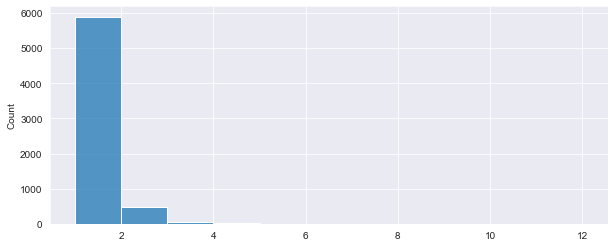

In [75]:
#Distribution of number of dogs by individual owner
plt.figure(figsize=(10,4)) 
_=sns.histplot(data.groupby(by='id').size().sort_values(), binrange = (1, 12), binwidth = 1)

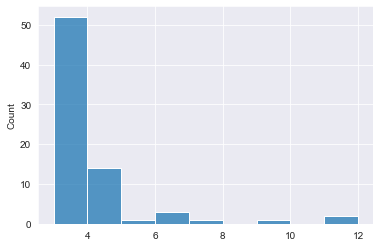

In [80]:
#Distribution of individual owner with more tahn 2 dogs
histdata=data.groupby(by='id').size().sort_values()
histdata=histdata[histdata>2]
_=sns.histplot(histdata, binrange = (3, 12), binwidth = 1)

In [77]:
#average number of dogs per owner
len(data['id'])/data['id'].nunique()

1.10487123797704

Text(0.5, 1.0, 'Popular Breeds Through time')

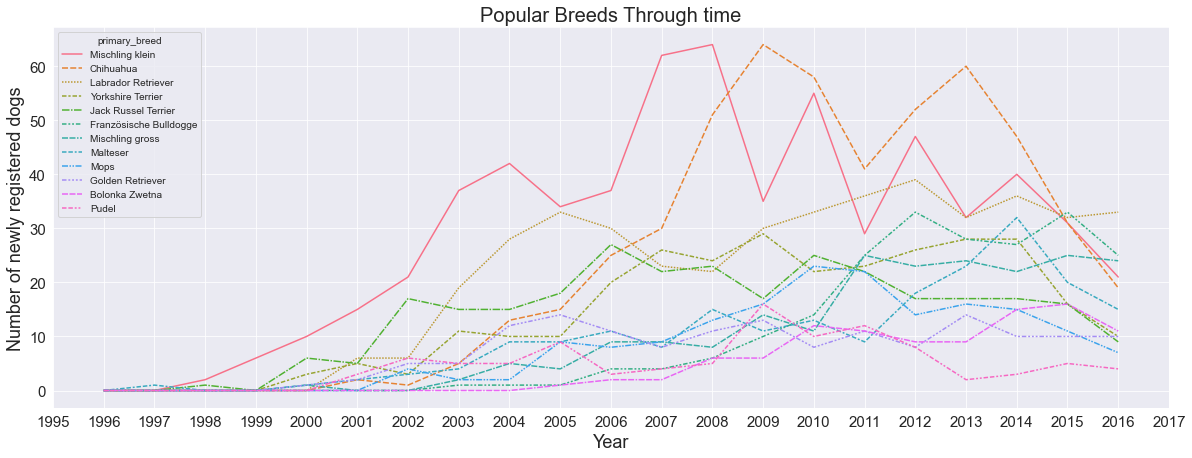

In [78]:
#popularity of breeds through time
data_plot = data[['primary_breed','dog_dob']].set_index('dog_dob')

lines = data_plot.groupby(['dog_dob','primary_breed']).size().unstack()
lines[np.isnan(lines)] = 0

pop_breed = lines[['Mischling klein', 'Chihuahua', 'Labrador Retriever','Yorkshire Terrier', 'Jack Russel Terrier','Französische Bulldogge', 'Mischling gross', 'Malteser', 'Mops','Golden Retriever', 'Bolonka Zwetna', 'Pudel']]
plt.figure(figsize=(20,7))
sns.lineplot(data=pop_breed),
plt.xticks(np.arange(1995, 2018, step=1), fontsize=15)
plt.yticks(np.arange(0, 70, step=10), fontsize=15)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Number of newly registered dogs', fontsize=18)
plt.title('Popular Breeds Through time', fontsize=20)
